# **Decision Trees - Drugs**

#Problem statement

**Context:**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

**Objective:**

Our objective is to build a decision tree model to find out which drug might be appropriate for a future patient with the same illness.

**Problem formulation:**

It is a sample of multiclass classifier, and we can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

**Data Dictionary:**

Age- Age of the patient

Sex- Sex of the patient

Blood Pressure- B.P of the patient

Na to K- Sodium-potassium

Cholestrol-Cholesterol of the patients

Drug - Drug that each patient responded to


**Data Source**

https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees


In [ ]:
# Importing all necessary libraries

import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  #for data visualization
from sklearn import datasets  # M.L library
import numpy as np  # for numericals

#Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

# Import the decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# for pre-processing

from sklearn import preprocessing





# Loading the dataset


In [ ]:
drug=pd.read_csv('/content/drug200.csv')
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Let us check for data types and missing values

In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Observations:**

There are 4 object datatype 1 int64 and 1 float64 datatype in the dataset

In [ ]:
drug.shape

(200, 6)

.**Observations:**

There are 200 rows and 6 columns in drug dataset

In [ ]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**observation:**

There are no null values in the dataset

In [ ]:
drug[drug.duplicated()].sum()

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

**Observation**

There are no duplicate values in the dataset.

#Summary Statistics

In [ ]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
drug.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


#Exploratory Data Analysis

In [ ]:
drug.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

**Observations**

.There are 57 unique values for Age column

.There are 2 unique values in the Sex column

.There are 3 unique values in the BP column

.There are 198 unique values in the Na to k column

.There are 5 unique values in the Drug (Target) column.

In [ ]:
drug.Age.value_counts().head()

47    8
23    7
28    7
49    7
39    6
Name: Age, dtype: int64

**Observations:**
.We can observe that the highest number of patients are of age 47.

In [ ]:
drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

**Observations:**

There are 104 male patients and 96 female patients

<Axes: xlabel='Sex', ylabel='count'>

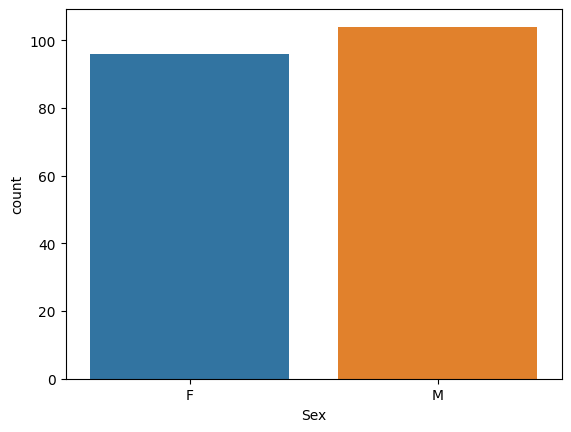

In [ ]:
import seaborn as sns
sns.countplot(data=drug,x='Sex')

In [ ]:
drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

([<matplotlib.patches.Wedge at 0x7a4ed3c8c880>,
 [Text(0.46658683078350566, 1.2347861067162218, 'High'),
  Text(-1.267587695435752, -0.3682681555332734, 'low'),
  Text(0.7925545432539803, -1.0555838649616973, 'Normal')],
 [Text(0.25450190770009395, 0.6735196945724845, ' 38.5%'),
  Text(-0.6914114702376828, -0.20087353938178548, ' 32.0%'),
  Text(0.43230247813853473, -0.5757730172518348, ' 29.5%')])

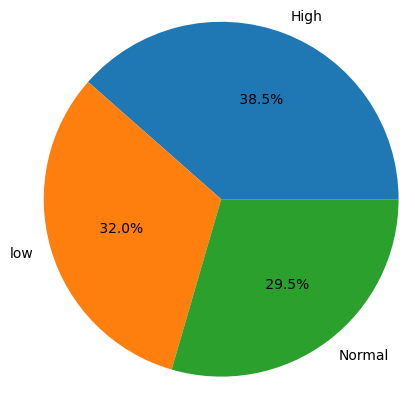

In [ ]:
plt.pie(drug.BP.value_counts(),autopct='% .1f%%',radius=1.2,labels=['High','low','Normal'])

In [ ]:
drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

([<matplotlib.patches.Wedge at 0x7a4ed3cbff10>,
 [Text(-0.06218045568066973, 1.318534637744244, 'High'),
  Text(0.06218045568066958, -1.318534637744244, 'Normal')],
 [Text(-0.03391661218945621, 0.7192007114968603, '51.5%'),
  Text(0.03391661218945613, -0.7192007114968603, '48.5%')])

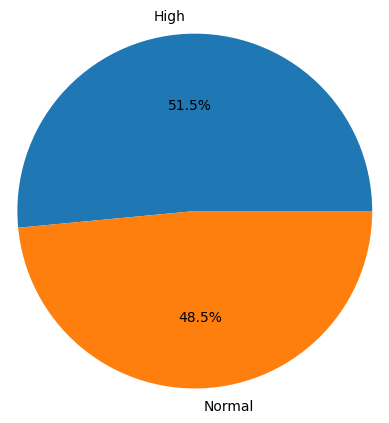

In [ ]:
plt.pie(drug.Cholesterol.value_counts(),autopct='%.1f%%',radius=1.2,labels=['High','Normal'])

In [ ]:
drug.Na_to_K.mean()

16.084485

In [ ]:
drug.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

([<matplotlib.patches.Wedge at 0x7a4ed3b232e0>,
 [Text(0.18598957232168623, 1.3068312358478413, 'drugY'),
  Text(-1.11451277954812, -0.7072914987640697, 'drugX'),
  Text(0.2676794319731955, -1.2925740681672782, 'drugA'),
  Text(0.9622387303265052, -0.9036020284725103, 'drugC'),
  Text(1.278529820636249, -0.32827046431843515, 'drugB')],
 [Text(0.10144885763001066, 0.7128170377351861, '45.5%'),
  Text(-0.6079160615717017, -0.3857953629622198, '27.0%'),
  Text(0.14600696289447027, -0.7050404008185153, '11.5%'),
  Text(0.5248574892690028, -0.4928738337122783, '8.0%'),
  Text(0.6973799021652267, -0.1790566169009646, '8.0%')])

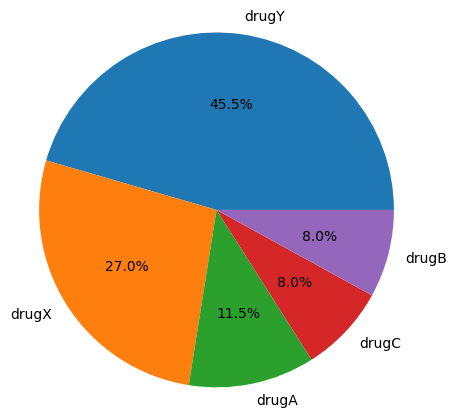

In [ ]:
plt.pie(drug.Drug.value_counts(),autopct='%.1f%%',radius=1.2,labels=['drugY','drugX','drugA','drugC','drugB'])

In [ ]:
drug[drug['Drug']=='drugY'].value_counts().sum()

91

<Axes: xlabel='Drug', ylabel='Age'>

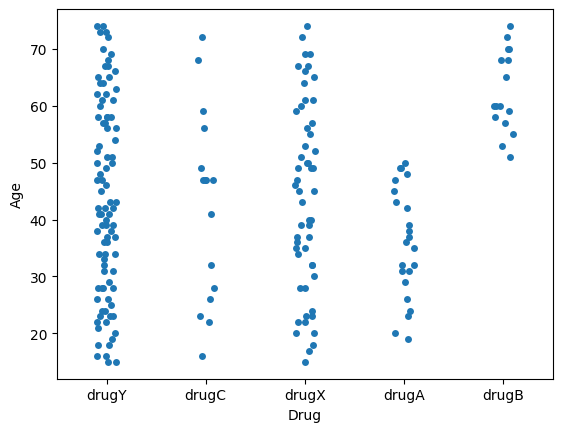

In [ ]:
sns.stripplot(y='Age',x='Drug',data=drug,jitter=True)

**Observation:**

.We can observe that the patients from all the age groups responded to drugY.

.We can observe that patients of age 50 and below responded to drugA.

.We can also observe that the patients above 50 only responded to drugB

#*Building Decision Tree model*

In [ ]:
drug['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
#Use label encoder to convert Drugs into numbers

label_encoder=preprocessing.LabelEncoder()
drug['Drug']=label_encoder.fit_transform(drug['Drug'])

In [ ]:
drug['Sex']=label_encoder.fit_transform(drug['Sex'])
drug['BP']=label_encoder.fit_transform(drug['BP'])
drug['Cholesterol']=label_encoder.fit_transform(drug['Cholesterol'])

In [ ]:
drug['Drug'].value_counts()

4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
drug.iloc[:,0:6]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
x=drug.iloc[:,0:5]
y=drug.iloc[:,5]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

#Splitting the dataset into 70% training data and 30% test data

In [ ]:
# Splitting the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=44)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((140, 5), (60, 5), (140,), (60,))

In [ ]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
135,74,1,1,1,11.939
73,41,0,2,1,22.905
157,53,1,1,0,22.963
28,39,0,1,1,22.697
23,48,0,1,0,15.036
79,32,0,1,1,10.840
54,68,0,0,1,10.189
3,28,0,2,0,7.798
114,20,0,2,1,9.281
124,53,0,0,1,12.495


In [ ]:
x_test.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
dtype: object

In [ ]:
y_test

135    3
73     4
157    4
28     4
23     4
79     3
54     1
3      3
114    3
124    1
180    4
111    3
182    3
64     1
9      4
68     4
35     3
45     3
89     4
47     2
177    4
126    4
142    1
7      2
12     4
32     3
181    3
136    1
105    3
178    4
48     4
190    4
112    3
81     3
95     3
43     3
158    2
187    0
99     4
65     4
138    1
46     0
118    0
85     1
110    0
141    4
199    3
115    4
37     3
184    4
2      2
44     3
17     0
108    1
152    3
106    3
51     3
58     3
125    4
6      4
Name: Drug, dtype: int64


#Building Decision Tree Classifier using Entropy as a Criterion

In [ ]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth=4)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#Plot the Decision Tree

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.907\nsamples = 140\nvalue = [18, 8, 12, 32, 70]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.814\nsamples = 70\nvalue = [18, 8, 12, 32, 0]'),
 Text(0.25, 0.5, 'x[0] <= 53.0\nentropy = 0.89\nsamples = 26\nvalue = [18, 8, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.845\nsamples = 44\nvalue = [0, 0, 12, 32, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.985\nsamples = 21\nvalue = [0, 0, 12, 9, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 70\nvalue = [0, 0, 0, 0, 70]')]

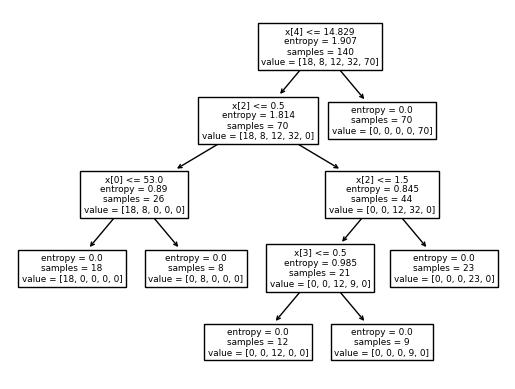

In [ ]:
tree.plot_tree(model)

In [ ]:
drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.907\nsamples = 140\nvalue = [18, 8, 12, 32, 70]\nclass = drugC'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.814\nsamples = 70\nvalue = [18, 8, 12, 32, 0]\nclass = drugB'),
 Text(0.25, 0.5, 'Age <= 53.0\nentropy = 0.89\nsamples = 26\nvalue = [18, 8, 0, 0, 0]\nclass = drugY'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'BP <= 1.5\nentropy = 0.845\nsamples = 44\nvalue = [0, 0, 12, 32, 0]\nclass = drugB'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\nentropy = 0.985\nsamples = 21\nvalue = [0, 0, 12, 9, 0]\nclass = drugA'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]\nclass = drugA'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0]\nclass = drugB'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]\nclass = drugB'),
 Text(0.75,

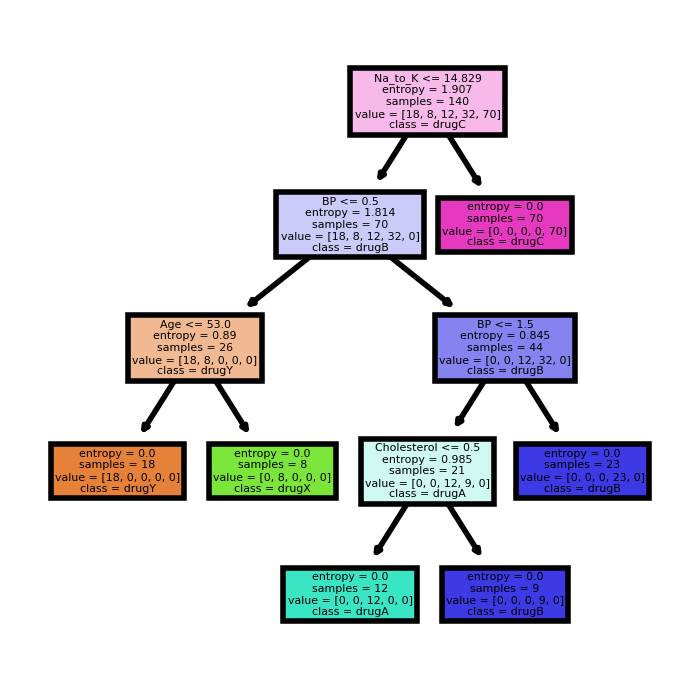

In [ ]:
fn=['Age','Sex','BP','Cholesterol','Na_to_K']   # features names
cn=['drugY','drugX','drugA','drugB','drugC']    # class names
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

In [ ]:
preds = model.predict(x_test)

In [ ]:
pd.Series(preds).value_counts()

3    22
4    21
0     7
1     6
2     4
dtype: int64

In [ ]:
preds

array([3, 4, 4, 4, 4, 3, 1, 3, 3, 0, 4, 3, 3, 1, 4, 4, 3, 3, 4, 2, 4, 4,
       1, 2, 4, 3, 3, 1, 3, 4, 4, 4, 3, 3, 3, 3, 2, 0, 4, 4, 0, 0, 0, 1,
       0, 4, 3, 4, 3, 4, 2, 3, 0, 1, 3, 3, 3, 3, 4, 4])

In [ ]:
y_test

135    3
73     4
157    4
28     4
23     4
79     3
54     1
3      3
114    3
124    1
180    4
111    3
182    3
64     1
9      4
68     4
35     3
45     3
89     4
47     2
177    4
126    4
142    1
7      2
12     4
32     3
181    3
136    1
105    3
178    4
48     4
190    4
112    3
81     3
95     3
43     3
158    2
187    0
99     4
65     4
138    1
46     0
118    0
85     1
110    0
141    4
199    3
115    4
37     3
184    4
2      2
44     3
17     0
108    1
152    3
106    3
51     3
58     3
125    4
6      4
Name: Drug, dtype: int64

#Crosstab: Two way table to understand Actual vs Predicted

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4
Drug,,,,,
0,5,0,0,0,0
1,2,6,0,0,0
2,0,0,4,0,0
3,0,0,0,22,0
4,0,0,0,0,21


#Accuracy of the model

In [ ]:
np.mean(preds==y_test)

0.9666666666666667